In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import cv2
import os
from google.colab.patches import cv2_imshow

In [4]:
input_1 = "/content/drive/MyDrive/BTL_ThiGiacMayTinh/GreenParking/GreenParking"
output_1 = "/content/drive/MyDrive/BTL_ThiGiacMayTinh/GreenParking/GreenParking_output_1_END"

In [5]:
os.makedirs(output_1, exist_ok=True)

In [6]:
image_data = os.listdir(input_1)

In [7]:
#Kiểm tra số liệu ảnh đầu vào
print('Số lượng ảnh đầu vào:' ,len(image_data))

Số lượng ảnh đầu vào: 1749


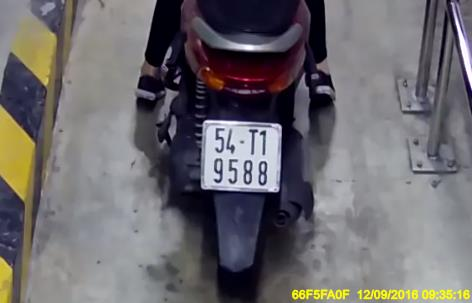

Hình dạng của ảnh 0235_04524_b.jpg: (303, 472, 3)



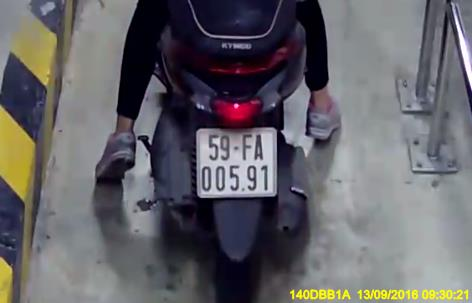

Hình dạng của ảnh 0230_06967_b.jpg: (303, 472, 3)



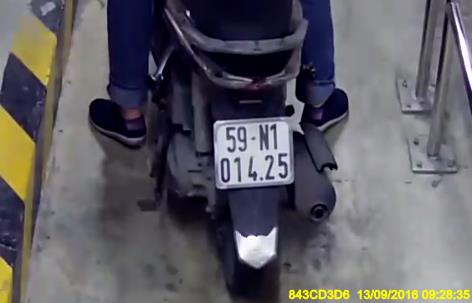

Hình dạng của ảnh 0228_01938_b.jpg: (303, 472, 3)



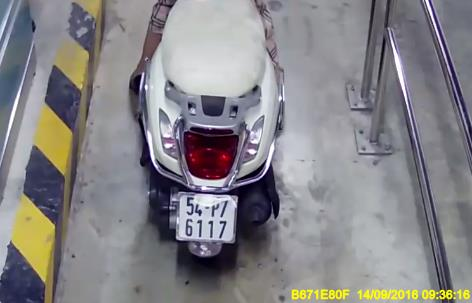

Hình dạng của ảnh 0236_04123_b.jpg: (303, 472, 3)



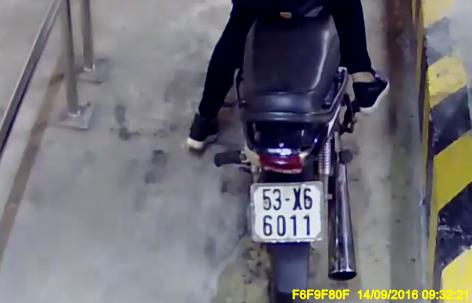

Hình dạng của ảnh 0232_07283_b.jpg: (303, 472, 3)



In [8]:
# In 5 ảnh đầu tiên
for i in range(min(5, len(image_data))): # Đảm bảo không vượt quá số lượng ảnh trong thư mục
    image_path = os.path.join(input_1, image_data[i]) # Tạo đường dẫn đầy đủ đến file ảnh

    # Đọc ảnh
    img = cv2.imread(image_path)

    # Kiểm tra nếu ảnh được đọc thành công
    if img is not None:
        cv2_imshow(img) # Hiển thị ảnh
        print(f"Hình dạng của ảnh {image_data[i]}: {img.shape}\n") # In hình dạng của ảnh
    else:
        print(f"Không thể đọc được ảnh tại đường dẫn: {image_path}\n") # In thông báo lỗi nếu không đọc được ảnh

# Tăng cường ảnh


In [9]:
#Xoay ảnh
def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

In [10]:
#Lật ảnh (dọc)
def flip_image(image):
    flipped_image = cv2.flip(image, 0)
    return flipped_image


In [11]:
#Thêm nhiễu
def add_noise(image):
    noise = np.random.normal(0, 20, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image


In [12]:
#Làm Mờ
def apply_gaussian_blur(image, kernel_size):
  return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [13]:
#Độ tương phản
def contrast_image(image):
    alpha = 1.5
    beta = 0
    contrasted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return contrasted_image

In [14]:
#Lưu các phép biến đổi
image_full = []
for image_name in image_data:
    # Kiểm tra định dạng file ảnh
    if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue  # Bỏ qua nếu không phải file ảnh

    image_path = os.path.join(input_1, image_name)
    img = cv2.imread(image_path)

    # Kiểm tra nếu ảnh được đọc thành công
    if img is not None:
        cv2.imwrite(os.path.join(output_1, 'original_' + image_name), img)

        # Áp dụng các phép biến đổi và lưu ảnh
        rotated = rotate_image(img, 45)
        cv2.imwrite(os.path.join(output_1, 'rotated_' + image_name), rotated)
        image_full.append(rotated)

        flipped = flip_image(img)
        cv2.imwrite(os.path.join(output_1, 'flipped_' + image_name), flipped)
        image_full.append(flipped)

        noisy = add_noise(img)
        cv2.imwrite(os.path.join(output_1, 'noisy_' + image_name), noisy)
        image_full.append(noisy)

        blurred = apply_gaussian_blur(img, 9)
        cv2.imwrite(os.path.join(output_1, 'blurred_' + image_name), blurred)
        image_full.append(blurred)

        contrasted = contrast_image(img)
        cv2.imwrite(os.path.join(output_1, 'contrasted_' + image_name), contrasted)
        image_full.append(contrasted)
    else:
        print(f"Could not read image: {image_path}")

print("Tăng cường dữ liệu đã xong!")

Tăng cường dữ liệu đã xong!


In [15]:
print(len(os.listdir(input_1)))

1749


In [16]:
print(len(os.listdir(output_1)))

10488


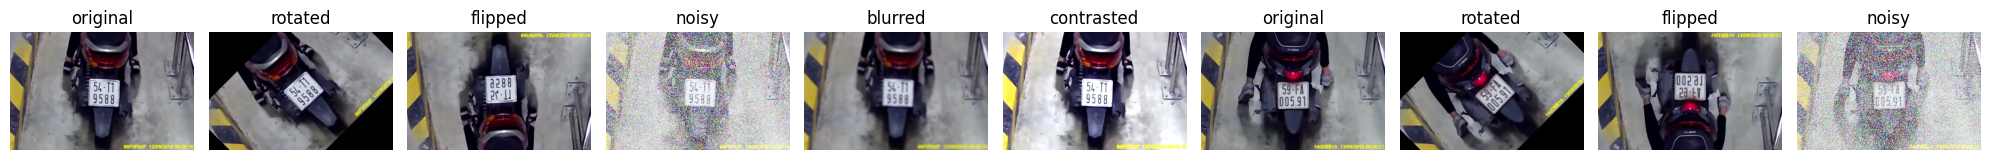

In [17]:
output_data = os.listdir(output_1)

# Số lượng ảnh muốn hiển thị theo chiều ngang
num_images_horizontal = 10

# Tạo figure và axes
fig, axes = plt.subplots(1, num_images_horizontal, figsize=(20, 5)) # Điều chỉnh figsize cho phù hợp

# Duyệt qua 10 file ảnh đầu tiên trong output_data
for i, filename in enumerate(output_data[:num_images_horizontal]):
    # Kiểm tra định dạng file ảnh
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    # Đường dẫn đến file ảnh
    image_path = os.path.join(output_1, filename)

    # Đọc ảnh bằng OpenCV
    img = cv2.imread(image_path)

    # Chuyển đổi màu sắc từ BGR sang RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Lấy tên phép biến đổi từ tên file
    transform_name = filename.split('_')[0]

    # Hiển thị ảnh trong ô tương ứng
    axes[i].imshow(img_rgb)
    axes[i].set_title(transform_name)  # Đặt tiêu đề
    axes[i].axis('off')  # Ẩn trục tọa độ


plt.tight_layout()  # Điều chỉnh layout để tránh chồng chéo
plt.show()